<br><br><center><h1 style="font-size:2em;color:#2467C0">Final Exam-Chen Zhang</h1></center>

**To begin with, we need to import all packages**

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import rc
import datetime

In [15]:
data = pd.read_excel("C:/Users/zchen/Desktop/banklist.xlsx")  # read file

In [16]:
data.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2018-02-21
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2018-03-22
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Question1-XY Plot</p>

Instruction: Is there a trend over time (increasing or decreasing numbers of failures since 2000)? Show a line plot of bank failures over time.

In [17]:
data['year'] = data['Closing Date'].apply(lambda x: x.year)  #extract year" from closing date

In [18]:
data.head(2)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2018-02-21,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21,2017


In [19]:
#count bank failures with one year
bankfail_year = data[['Bank Name','year']].groupby('year',as_index= False).count()  

In [20]:
bankfail_year

,year,Bank Name
0,2000,2
1,2001,4
2,2002,11
3,2003,3
4,2004,4
5,2007,3
6,2008,25
7,2009,140
8,2010,157
9,2011,92


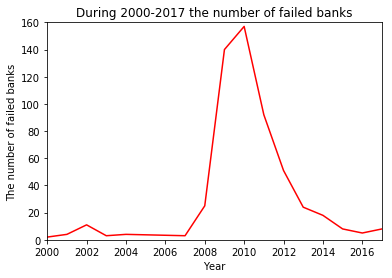

In [21]:
X = bankfail_year['Bank Name'].values   #exteact values
Y = bankfail_year['year']
plt.plot(Y,X, color="r")

plt.xlabel('Year') 
plt.ylabel('The number of failed banks')

plt.title('During 2000-2017 the number of failed banks')

plt.axis([2000,2017,0,160])  #X axis min, max, Y axis min max
plt.show()

<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Question2-Bar Plot</p>

Instruction: Some acquiring institutions have picked up quite a few failed banks, others just one. Some failed banks were not acquired at all Produce a stacked bar chart showing the top few acquiring institutions. The height of the bar should correspond to the number of acquisitions. Each bar stack can be segmented by the state of the failed bank acquired, with a color or hatch pattern assigned to each state.

In [22]:
data = pd.read_excel("C:/Users/zchen/Desktop/banklist.xlsx") 
data['freq'] = data.groupby('Acquiring Institution')['Acquiring Institution'].transform('count')  #count freqency
data.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,freq
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2018-02-21,1
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21,1
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,4
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2018-03-22,11
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,1


In [23]:
state_freq = data[['freq','Acquiring Institution','ST']]
state_freq=state_freq.sort_values(by='freq',ascending=False) #sort values
state_freq_count = data[['freq','ST']].groupby('freq' ,as_index=False).count()
state_freq["freq"].unique().tolist()  # to see how many different values are there

[31, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [24]:
#In this case, we only care about the the acquiring banks, then we ignore "no acquire"
data12 = state_freq[state_freq['freq'] == 12]   #select the freq = 12
data11 = state_freq[state_freq['freq'] == 11]
data10 = state_freq[state_freq['freq'] == 10]
data9 = state_freq[state_freq['freq'] == 9]
data8 = state_freq[state_freq['freq']==8]


data12_state = data12[['freq','ST']].groupby('ST',as_index=False).count()  #groupby state
data11_state = data11[['freq','ST']].groupby('ST',as_index=False).count()
data10_state = data10[['freq','ST']].groupby('ST',as_index=False).count()
data9_state = data9[['freq','ST']].groupby('ST',as_index=False).count()
data8_state = data8[['freq','ST']].groupby('ST',as_index=False).count()

#merge data by state
combine1 = data9_state.merge(data8_state, on="ST", how="outer")
combine2 = data10_state.merge(combine1, on="ST", how="outer")
combine3 = data11_state.merge(combine2, on="ST", how="outer")
combine = data12_state.merge(combine3, on="ST", how="outer")

#replace missing value to 0
combine = combine.fillna(0)
combine.rename(index=str, columns={"freq": "high1", "freq_x": "high2","freq_y":"high3","freq_x": "high4","freq_y":"high5"})


,ST,high1,high4,high5,high4,high5
0,GA,12.0,1.0,9.0,0.0,8.0
1,CA,0.0,2.0,0.0,3.0,0.0
2,CO,0.0,2.0,0.0,0.0,0.0
3,FL,0.0,1.0,1.0,0.0,0.0
4,NJ,0.0,1.0,0.0,0.0,0.0
5,PA,0.0,1.0,0.0,0.0,0.0
6,WA,0.0,1.0,0.0,0.0,0.0
7,WI,0.0,2.0,0.0,0.0,0.0
8,AZ,0.0,0.0,0.0,1.0,0.0
9,IL,0.0,0.0,0.0,2.0,0.0


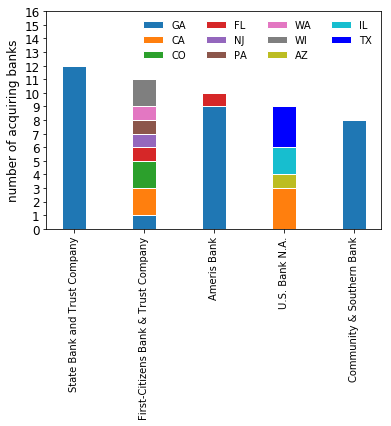

In [25]:
N = 5

GA = combine.iloc[0,1:6].values
CA = combine.iloc[1,1:6].values
CO = combine.iloc[2,1:6].values
FL = combine.iloc[3,1:6].values
NJ = combine.iloc[4,1:6].values
PA = combine.iloc[5,1:6].values
WA = combine.iloc[6,1:6].values
WI = combine.iloc[7,1:6].values
AZ = combine.iloc[8,1:6].values
IL = combine.iloc[9,1:6].values
TX = combine.iloc[10,1:6].values


ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind,GA,width,edgecolor='white')
p2 = plt.bar(ind,CA,width,bottom=GA,edgecolor='white')
p3 = plt.bar(ind,CO,width,bottom=GA+CA,edgecolor='white')
p4 = plt.bar(ind,FL,width,bottom=GA+CA+CO,edgecolor='white')
p5 = plt.bar(ind,NJ,width,bottom=GA+CA+CO+FL,edgecolor='white')
p6 = plt.bar(ind,PA,width,bottom=GA+CA+CO+FL+NJ,edgecolor='white')
p7 = plt.bar(ind,WA,width,bottom=GA+CA+CO+FL+NJ+PA,edgecolor='white')
p8 = plt.bar(ind,WI,width,bottom=GA+CA+CO+FL+NJ+PA+WA,edgecolor='white')
p9 = plt.bar(ind,AZ,width,bottom=GA+CA+CO+FL+NJ+PA+WA+WI,edgecolor='white')
p10 = plt.bar(ind,IL,width,bottom=GA+CA+CO+FL+NJ+PA+WA+WI+AZ,edgecolor='white')
p11 = plt.bar(ind,TX,width,bottom=GA+CA+CO+FL+NJ+PA+WA+WI+AZ+IL,edgecolor='white',color="bwr")

plt.yticks(fontsize=12)
plt.ylabel("number of acquiring banks",fontsize=12)
plt.xticks(ind,(data12['Acquiring Institution'].iloc[0],
                data11['Acquiring Institution'].iloc[0],
                data10['Acquiring Institution'].iloc[0],
                data9['Acquiring Institution'].iloc[0],
                data8['Acquiring Institution'].iloc[0]
               )
           ,fontsize =10,rotation=90)

plt.yticks(np.arange(0,17,1))
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0],p10[0],p11[0]),
           ('GA','CA','CO','FL','NJ','PA','WA','WI','AZ','IL','TX'),
           fontsize=10, ncol=4, framealpha=0, fancybox=True)

plt.show()

<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Question3-Radial Plot</p>

Instruction: Is there a particular time of year when more banks or fewer banks tend to fail than other times of year? Show a plot. Produce a circular plot of 12 segments corresponding to months of the year, with the radius of each segment corresponding to the relative rates of failure for that month.

In [40]:
data = pd.read_excel("C:/Users/zchen/Desktop/banklist.xlsx")

In [41]:
data['month'] = data['Closing Date'].apply(lambda x: x.month)

In [42]:
data.head(2)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,month
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2018-02-21,12
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21,10


In [43]:
bankfail_month = data[['Bank Name','month']].groupby('month',as_index=False).count()
bankfail_month

,month,Bank Name
0,1,51
1,2,44
2,3,40
3,4,59
4,5,43
5,6,36
6,7,74
7,8,41
8,9,38
9,10,59


In [44]:
#set up for plotly grap
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='chen.zhang',api_key='YMF6M8sN6BKkfYdfoQDl')

In [45]:
#plot
trace = go.Barpolar(r=bankfail_month['Bank Name'].values,
                    text=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],
                    marker = dict(
                    color = 'rgb(106,81,163)'
                    )
)
data = [trace]

layout = go.Layout(
    title = 'During the same month, how many banks failed',
    font=dict(size=16),

)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='pandas-wind-rose-chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Chen.Zhang/0 or inside your plot.ly account where it is named 'pandas-wind-rose-chart'


<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Question4-Map Plot</p>

Instructions: How does each state do relative to the others? Produce a choropleth map (thematic geographic math) showing the numbers of failures in each state.

In [9]:
data = pd.read_excel("C:/Users/zchen/Desktop/banklist.xlsx")

In [10]:
bankfail_states_count = data[['Bank Name','ST']].groupby('ST',as_index=False).count()
bankfail_states_count

,ST,Bank Name
0,AL,7
1,AR,4
2,AZ,16
3,CA,41
4,CO,10
5,CT,2
6,FL,75
7,GA,93
8,HI,1
9,IA,2


In [11]:
import folium
from folium.features import Choropleth
us_state ='C:/Users/zchen/Documents/python final/us-states - Copy.json' 

In [12]:
m_state = folium.Map(location=[37,-102],zoom_start=2.5)

m_state.choropleth(
    geo_data=us_state,
    name='choropleth',
    data=bankfail_states_count, 
    columns=['ST','Bank Name'],
    key_on = 'feature.id', 
    fill_color ='RdPu',
    nan_fill_color ='white',  #white color in map represents missing values
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'How many banks failed within the state'
)

folium.LayerControl().add_to(m_state)

#create
m_state.save('bank_state_map.html')


D:\anaconda\lib\site-packages\folium\folium.py:432: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [13]:
from IPython.display import HTML
HTML('<iframe src=bank_state_map.html width=700 height = 450></iframe>')

<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Question5-Intuition</p>

Instructions: Is there an observable pattern to the banks that failed to be acquired, related to date, location, or number of failures in a state?

Based on the Q1-Q4 we can see that there are a lot banks are failed in 2010, and Georgia State seemed to be more troubled in terms of bank failures over this time period. Based on the map ,we can also see that east coast to be more troubled in terms of banks failures than west coast. There must be some reasons behind this intuition.

<br><p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Question6-Related Articles</p>

Instruction: Is there a state or states that seemed to be more troubled in terms of bank failures than others over this time period? If so, can you provide an explanation? This may require research into other materials.

In [247]:
url = "https://www.nytimes.com/2010/04/12/opinion/12krugman.html"  #related materials

First, because of housing price bubbles that permissive zoning and abundant land make it easy to increase the housing supply, a situation that prevented big price increases and therefore prevented a serious bubble. <br>
Second, the share of mortgages with delinquent payments is higher in Georgia than other states. <br>
Thrid, the case of Georgia shows that bad behavior by many small banks can do as much damage as misbehavior by a few financial giants. 